In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy.stats as stat
import random
import diff_classifier.aws as aws
import diff_classifier.msd as msd
from diff_classifier.msd import binning, precision_weight, precision_averaging, plot_all_experiments
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
folder = '06_20_18_5k_10k_PEG_agarose'
bucket = 'dtoghani.data'
experiment = '100nm_5k_PEG' #Used for naming purposes. Should exclude XY and well information

vids = 20
to_track = []
wells = 4
frames = 651
fps = 100.02

for num in range(1, vids+1):
    to_track.append('100nm_5k_PEG_XY{}'.format('%02d' % num)) #As per usual, use for loops to include all experiments

slices, bins, well_names = binning(to_track)
geoM2xy = {}
gSEM = {}
for sample_name in to_track:
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geoM2xy[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))

In [3]:
geo_slices = {}
gSEM_slices = {}

w_slices = {}
wo_slices = {}

for key in bins:
    wo_slices[key] = precision_weight(bins[key], gSEM)
    geo_slices[key], gSEM_slices[key] = precision_averaging(bins[key], geoM2xy, gSEM, wo_slices[key]) 

weights = precision_weight(well_names, gSEM_slices)
geo, gS = precision_averaging(well_names, geo_slices, gSEM_slices, weights, bucket=bucket, folder=folder, experiment=experiment)

/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:581: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:622: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(gSEM[sample]*gSEM[sample]))/weights
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:622: RuntimeWarning: invalid value encountered in true_divide
  w_holder[video_counter, :] = (1/(gSEM[sample]*gSEM[sample]))/weights
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:624: RuntimeWarning: divide by zero encountered in true_divide
  gSEM_holder[video_counter, :] = (1/(gSEM[sample]*gSEM[sample]))
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:581: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(gSEM[sample]*gSEM[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:62

Text(0,0.5,'Mean Squared Displacement ($\\mu$m$^2$/s)')

Text(0,0.5,'Mean Squared Displacement ($\\mu$m$^2$/s)')

Text(0,0.5,'Mean Squared Displacement ($\\mu$m$^2$/s)')

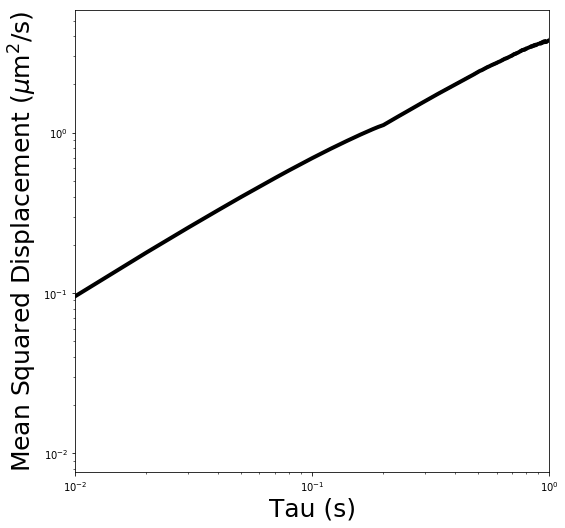

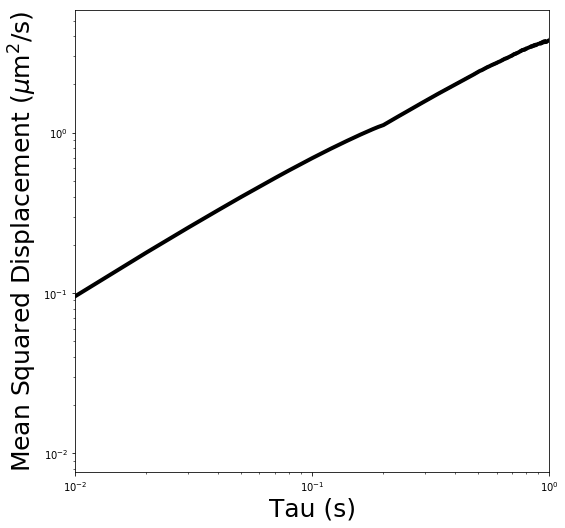

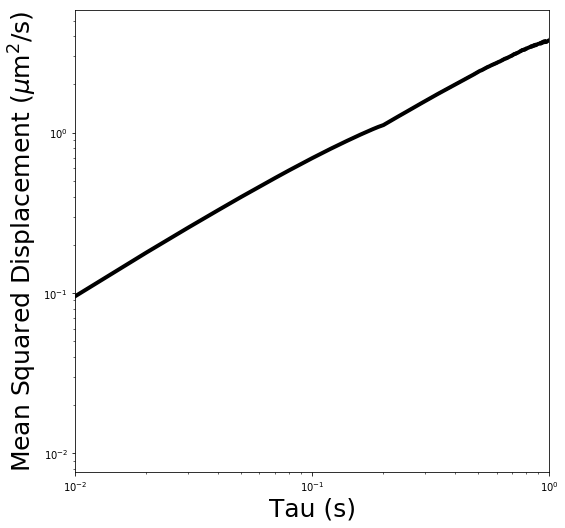

In [4]:
#Plot as desired. Can also modift to include multiple datasets as needed. Yay!

fig = plt.figure(figsize=(8.5, 8.5))
y_range = 1
plt.xlim(10**-2, 10**0)
#plt.ylim(0, y_range)

x = np.linspace(0, frames-1, frames)/fps

plt.loglog(x, np.exp(geo), 'k', linewidth=4)
plt.loglog(x, np.exp(geo - 1.96*gS), 'k--', linewidth=2)
plt.loglog(x, np.exp(geo + 1.96*gS), 'k--', linewidth=2)

plt.xlabel('Tau (s)', fontsize=25)
plt.ylabel(r'Mean Squared Displacement ($\mu$m$^2$/s)', fontsize=25)

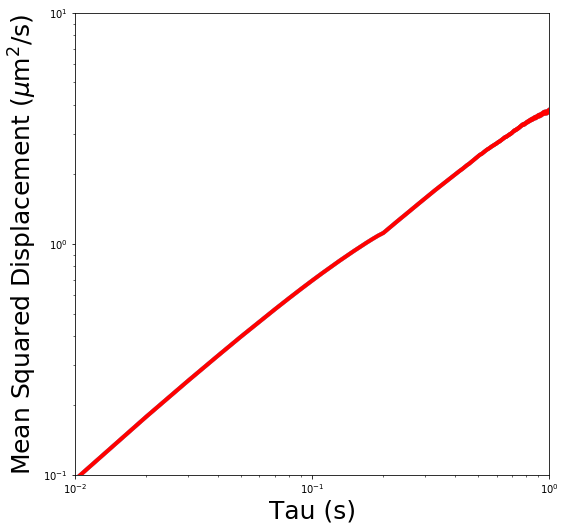

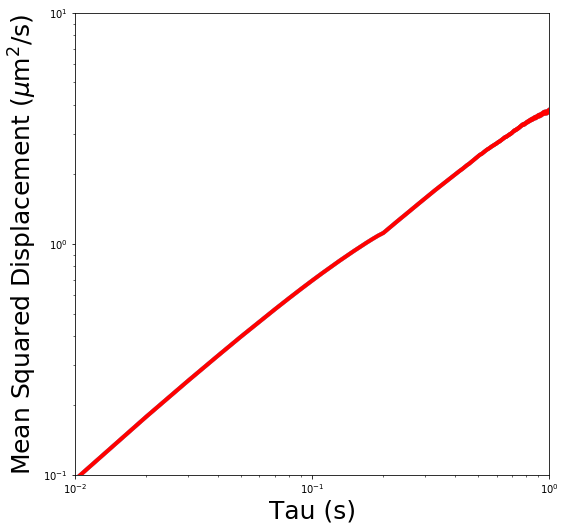

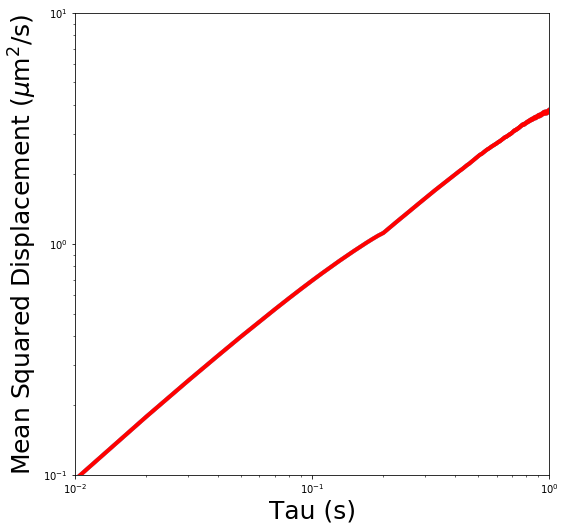

In [6]:
to_plot_f = [experiment, experiment, experiment]
plot_all_experiments(to_plot_f, bucket=bucket, folder=folder)